In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# This also defines Ccl_identity

In [2]:
Path='/home/mgander/Atlantic/data/'

In [3]:
# Downloaded from https://data.broadinstitute.org/ccle_legacy_data/mRNA_expression/

In [4]:
df=pd.read_csv(f'{Path}Additionals/CCLE_Expression_Entrez_2012-10-18.res', sep=None)
df

/tmp/ipykernel_13254/737102894.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(f'{Path}Additionals/CCLE_Expression_Entrez_2012-10-18.res', sep=None)


,Description,LN18_CENTRAL_NERVOUS_SYSTEM,Unnamed: 2,769P_KIDNEY,Unnamed: 4,786O_KIDNEY,Unnamed: 6,CAOV3_OVARY,Unnamed: 8,HEPG2_LIVER,...,HK2_KIDNEY,Unnamed: 2064,EW8_BONE,Unnamed: 2066,UOK101_KIDNEY,Unnamed: 2068,JHESOAD1_OESOPHAGUS,Unnamed: 2070,CH157MN_CENTRAL_NERVOUS_SYSTEM,Unnamed: 2072
LOC100009676,100009676_at,5.987545,P,5.444892,A,5.838828,A,6.074743,P,5.788600,...,5.362021,M,5.799747,A,5.865606,P,5.463812,A,5.720593,A
AKT3,10000_at,6.230233,P,7.544216,P,7.328450,P,4.270720,P,4.478293,...,7.031690,P,4.881235,P,6.914640,P,5.313795,P,5.757825,P
MED6,10001_at,9.363550,P,8.715909,P,8.410834,P,9.845271,P,9.761157,...,8.362727,P,8.990524,P,8.958629,P,9.748100,P,9.758431,P
NR2E3,10002_at,3.803069,A,4.173643,A,3.776557,A,3.934091,A,3.822202,...,4.434658,A,4.127832,A,3.942736,A,4.062648,A,4.074257,A
NAALAD2,10003_at,3.586430,A,3.663081,A,4.047007,A,3.817250,A,6.444302,...,3.622032,A,5.436580,P,3.666404,A,3.556565,A,3.728828,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,AFFX-ThrX-5_at,3.947751,A,3.988894,A,3.911904,A,3.824781,A,3.944165,...,3.738216,A,3.977983,A,3.712721,A,3.779538,A,4.046171,A
NaN,AFFX-ThrX-M_at,3.497965,A,3.582763,A,3.635232,A,3.499958,A,3.502756,...,3.801019,A,3.623650,A,3.674538,A,3.563629,A,3.760560,A
NaN,AFFX-TrpnX-3_at,3.458920,M,3.501799,A,3.655942,A,3.425621,M,3.362730,...,3.376598,A,3.244393,A,3.348741,A,3.601403,A,3.450426,A
NaN,AFFX-TrpnX-5_at,3.676999,A,3.866982,A,4.116417,A,3.727254,A,3.747193,...,3.945100,A,3.736915,A,3.691115,A,3.999231,A,3.836024,A


In [5]:
cols_kept=[a for a in df.columns if a[:5]!='Unnam']
df=df[cols_kept].copy()
df

,Description,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
LOC100009676,100009676_at,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,10000_at,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,10001_at,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,10002_at,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,10003_at,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,AFFX-ThrX-5_at,3.947751,3.988894,3.911904,3.824781,3.944165,3.850168,3.649919,3.822941,3.980232,...,3.924541,3.769401,3.964182,3.897100,3.885320,3.738216,3.977983,3.712721,3.779538,4.046171
NaN,AFFX-ThrX-M_at,3.497965,3.582763,3.635232,3.499958,3.502756,3.617718,3.296339,3.489711,3.459186,...,3.558099,3.694182,3.604038,3.678918,3.699749,3.801019,3.623650,3.674538,3.563629,3.760560
NaN,AFFX-TrpnX-3_at,3.458920,3.501799,3.655942,3.425621,3.362730,3.509351,3.406460,3.472321,3.429169,...,3.342382,3.301146,3.436527,3.409053,3.260275,3.376598,3.244393,3.348741,3.601403,3.450426
NaN,AFFX-TrpnX-5_at,3.676999,3.866982,4.116417,3.727254,3.747193,3.900274,3.576092,3.849383,3.653029,...,3.717511,3.658742,3.900218,3.754157,3.829654,3.945100,3.736915,3.691115,3.999231,3.836024


In [6]:
df=df.iloc[:,1:].copy()
df

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,5.801820,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,6.808673,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,9.815614,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,4.028581,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,3.835827,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,3.947751,3.988894,3.911904,3.824781,3.944165,3.850168,3.649919,3.822941,3.980232,4.248334,...,3.924541,3.769401,3.964182,3.897100,3.885320,3.738216,3.977983,3.712721,3.779538,4.046171
NaN,3.497965,3.582763,3.635232,3.499958,3.502756,3.617718,3.296339,3.489711,3.459186,3.427867,...,3.558099,3.694182,3.604038,3.678918,3.699749,3.801019,3.623650,3.674538,3.563629,3.760560
NaN,3.458920,3.501799,3.655942,3.425621,3.362730,3.509351,3.406460,3.472321,3.429169,3.611959,...,3.342382,3.301146,3.436527,3.409053,3.260275,3.376598,3.244393,3.348741,3.601403,3.450426
NaN,3.676999,3.866982,4.116417,3.727254,3.747193,3.900274,3.576092,3.849383,3.653029,3.959677,...,3.717511,3.658742,3.900218,3.754157,3.829654,3.945100,3.736915,3.691115,3.999231,3.836024


# Map to cellosaurus

In [7]:
def purge_and_capitalize(ccl):
    ccl_str=ccl.replace('-', '')
    ccl_str=ccl_str.replace(' ', '')
    return(ccl_str.upper())

def map_celllines_to_cellosaurus(ccls):
    # Let's remove '-' and spaces and capitalize everything
    D_ccl={}

    for ccl in ccls:
        D_ccl[ccl]=purge_and_capitalize(ccl)
    ccl_red=sorted(set([D_ccl[a] for a in ccls]))
    len(ccl_red)
    
    Path='/home/mgander/Atlantic/data/'
    dfc=pd.read_pickle(f'{Path}/Viability/CCL_dict/Cellosaurus_CCLs.pkl')
    dfc=dfc[dfc['Species']=='NCBI_TaxID=9606; ! Homo sapiens (Human)']

    # Use the synonyms to map to the Cellosaurus ID
    cellosaurus_ids=list(dfc['Cellosaurus_ID'])
    syns=list(dfc['Synonyms'])

    syn_l=[]
    for s in syns:
        if '; ' in s:
            syn_l.append(s.split('; '))
        else:
            syn_l.append(s)
    D_cello={cellosaurus_ids[i]:cellosaurus_ids[i] for i in range(len(cellosaurus_ids))}

    for i in range(len(syn_l)):
        for s in syn_l[i]:
            D_cello[s]=cellosaurus_ids[i]
            
    ccl_red=sorted(set(ccl_red))
    for ccl in ccl_red:
        if ccl in cellosaurus_ids:
            D_cello[ccl]=ccl
            
    D_cello['C106']='C106[HUMANRECTALADENOCARCINOMA]'
    D_cello['CC20']='CC20[HUMANCOLONADENOCARCINOMA]'
    D_cello['NCIADRES']='NCIADRRES'
    D_cello['Hela']='HELA'
    
    D_cello['L33']='L3.3'
    
    D_cello['CJM']='CJM[HUMANMELANOMA]'
    D_cello['HARA']='HARA[HUMANSQUAMOUSCELLLUNGCARCINOMA]'
    D_cello['HH']='HH[HUMANLYMPHOMA]'
    D_cello['KS1']='KS1[HUMANGLIOBLASTOMA]'
    D_cello['ML1']='ML1[HUMANTHYROIDCARCINOMA]'
    
    D_cello['TT_THYROID']='TT'
    D_cello['TT_OESOPHAGUS']='T.T'
    
    keys=list(D_cello.keys())
    # Still missing
    for ccl_red in ccl_red:
        if not ccl_red in keys:
            print(f'{ccl_red}')
    #return([D_ccl[a] for a in ccls])
    
    return([D_cello[D_ccl[a]] for a in ccls])

In [8]:
ccls=[a.split('_')[0] if a.split('_')[0]!='TT' else a for a in df.columns]

In [9]:
ccl_type=[a.split('_')[1] for a in df.columns if '_' in a]

In [10]:
ccls=map_celllines_to_cellosaurus(ccls)

In [11]:
df.columns=ccls

In [12]:
df

,LN18,769P,786O,CAOV3,HEPG2,MOLT4,NCIH524,NCIH209,MIAPACA2,MCAS,...,SLR21,LN308,LN340,HCC827GR5,SLR20,HK2[HUMANKIDNEY],EW8,UOK101,JHESOAD1,CH157MN
LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,5.801820,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,6.808673,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,9.815614,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,4.028581,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,3.835827,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,3.947751,3.988894,3.911904,3.824781,3.944165,3.850168,3.649919,3.822941,3.980232,4.248334,...,3.924541,3.769401,3.964182,3.897100,3.885320,3.738216,3.977983,3.712721,3.779538,4.046171
NaN,3.497965,3.582763,3.635232,3.499958,3.502756,3.617718,3.296339,3.489711,3.459186,3.427867,...,3.558099,3.694182,3.604038,3.678918,3.699749,3.801019,3.623650,3.674538,3.563629,3.760560
NaN,3.458920,3.501799,3.655942,3.425621,3.362730,3.509351,3.406460,3.472321,3.429169,3.611959,...,3.342382,3.301146,3.436527,3.409053,3.260275,3.376598,3.244393,3.348741,3.601403,3.450426
NaN,3.676999,3.866982,4.116417,3.727254,3.747193,3.900274,3.576092,3.849383,3.653029,3.959677,...,3.717511,3.658742,3.900218,3.754157,3.829654,3.945100,3.736915,3.691115,3.999231,3.836024


In [13]:
# Filter out genes that are NaNs

In [14]:
genes_kept=[a for a in df.index if str(a)!='nan']

In [15]:
df=df.loc[genes_kept].copy()
df

,LN18,769P,786O,CAOV3,HEPG2,MOLT4,NCIH524,NCIH209,MIAPACA2,MCAS,...,SLR21,LN308,LN340,HCC827GR5,SLR20,HK2[HUMANKIDNEY],EW8,UOK101,JHESOAD1,CH157MN
LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,5.801820,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,6.808673,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,9.815614,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,4.028581,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,3.835827,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DGCR2,7.114737,6.646730,7.017450,7.874179,7.217024,6.555195,6.299182,7.089467,7.029342,6.926991,...,7.530690,7.455342,7.494420,7.271699,7.790399,7.525638,6.598140,7.710038,8.845590,7.108889
CASP8AP2,8.277468,8.307294,8.164722,8.924722,8.087951,9.687675,9.149011,9.909559,8.912862,8.678884,...,8.795459,9.363661,8.754270,8.181809,9.900131,9.055190,9.923738,9.027059,8.928701,9.027435
SCO2,10.318660,9.801101,9.458163,9.902198,9.864440,9.196542,9.043360,8.637499,10.165630,9.251720,...,9.364265,9.689667,9.186703,9.598731,9.902050,9.938856,9.813928,10.188700,8.655696,9.392429
CDH1,4.514405,4.339788,4.357593,9.084565,6.152216,4.223292,4.473371,8.833071,4.672678,10.678490,...,5.831212,4.282857,4.392549,8.609531,4.506999,4.549227,4.640037,4.333575,7.974434,4.708535


In [16]:
np.isnan(df).sum().sum()

0

In [17]:
(df==0).sum().sum()

0

In [19]:
def z_transform(M0):
    M0=M0-np.array(M0.mean(1))[:,None]
    M0=M0/np.array(M0.std(1))[:,None]
    return(M0)

In [20]:
# Z-transforming makes the PCA plot look less nice
#df=z_transform(df)

<Axes: ylabel='Count'>

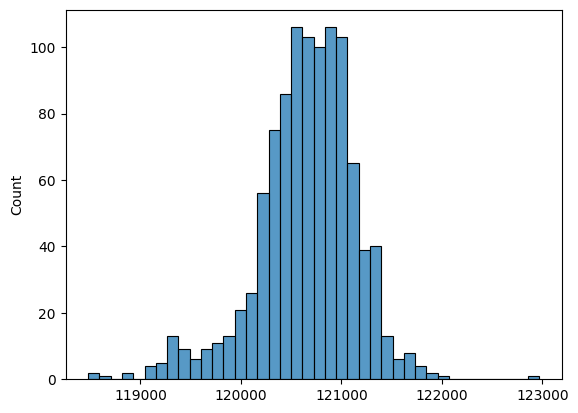

In [21]:
sns.histplot(df.sum())

<Axes: ylabel='Count'>

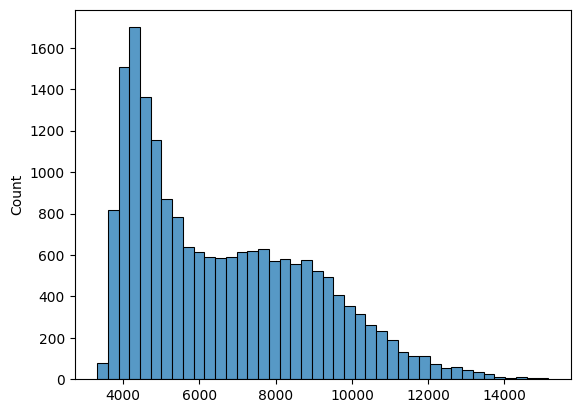

In [22]:
sns.histplot(df.sum(1))

In [23]:
# A quick PCA

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

Text(0, 0.5, 'PCA 2')

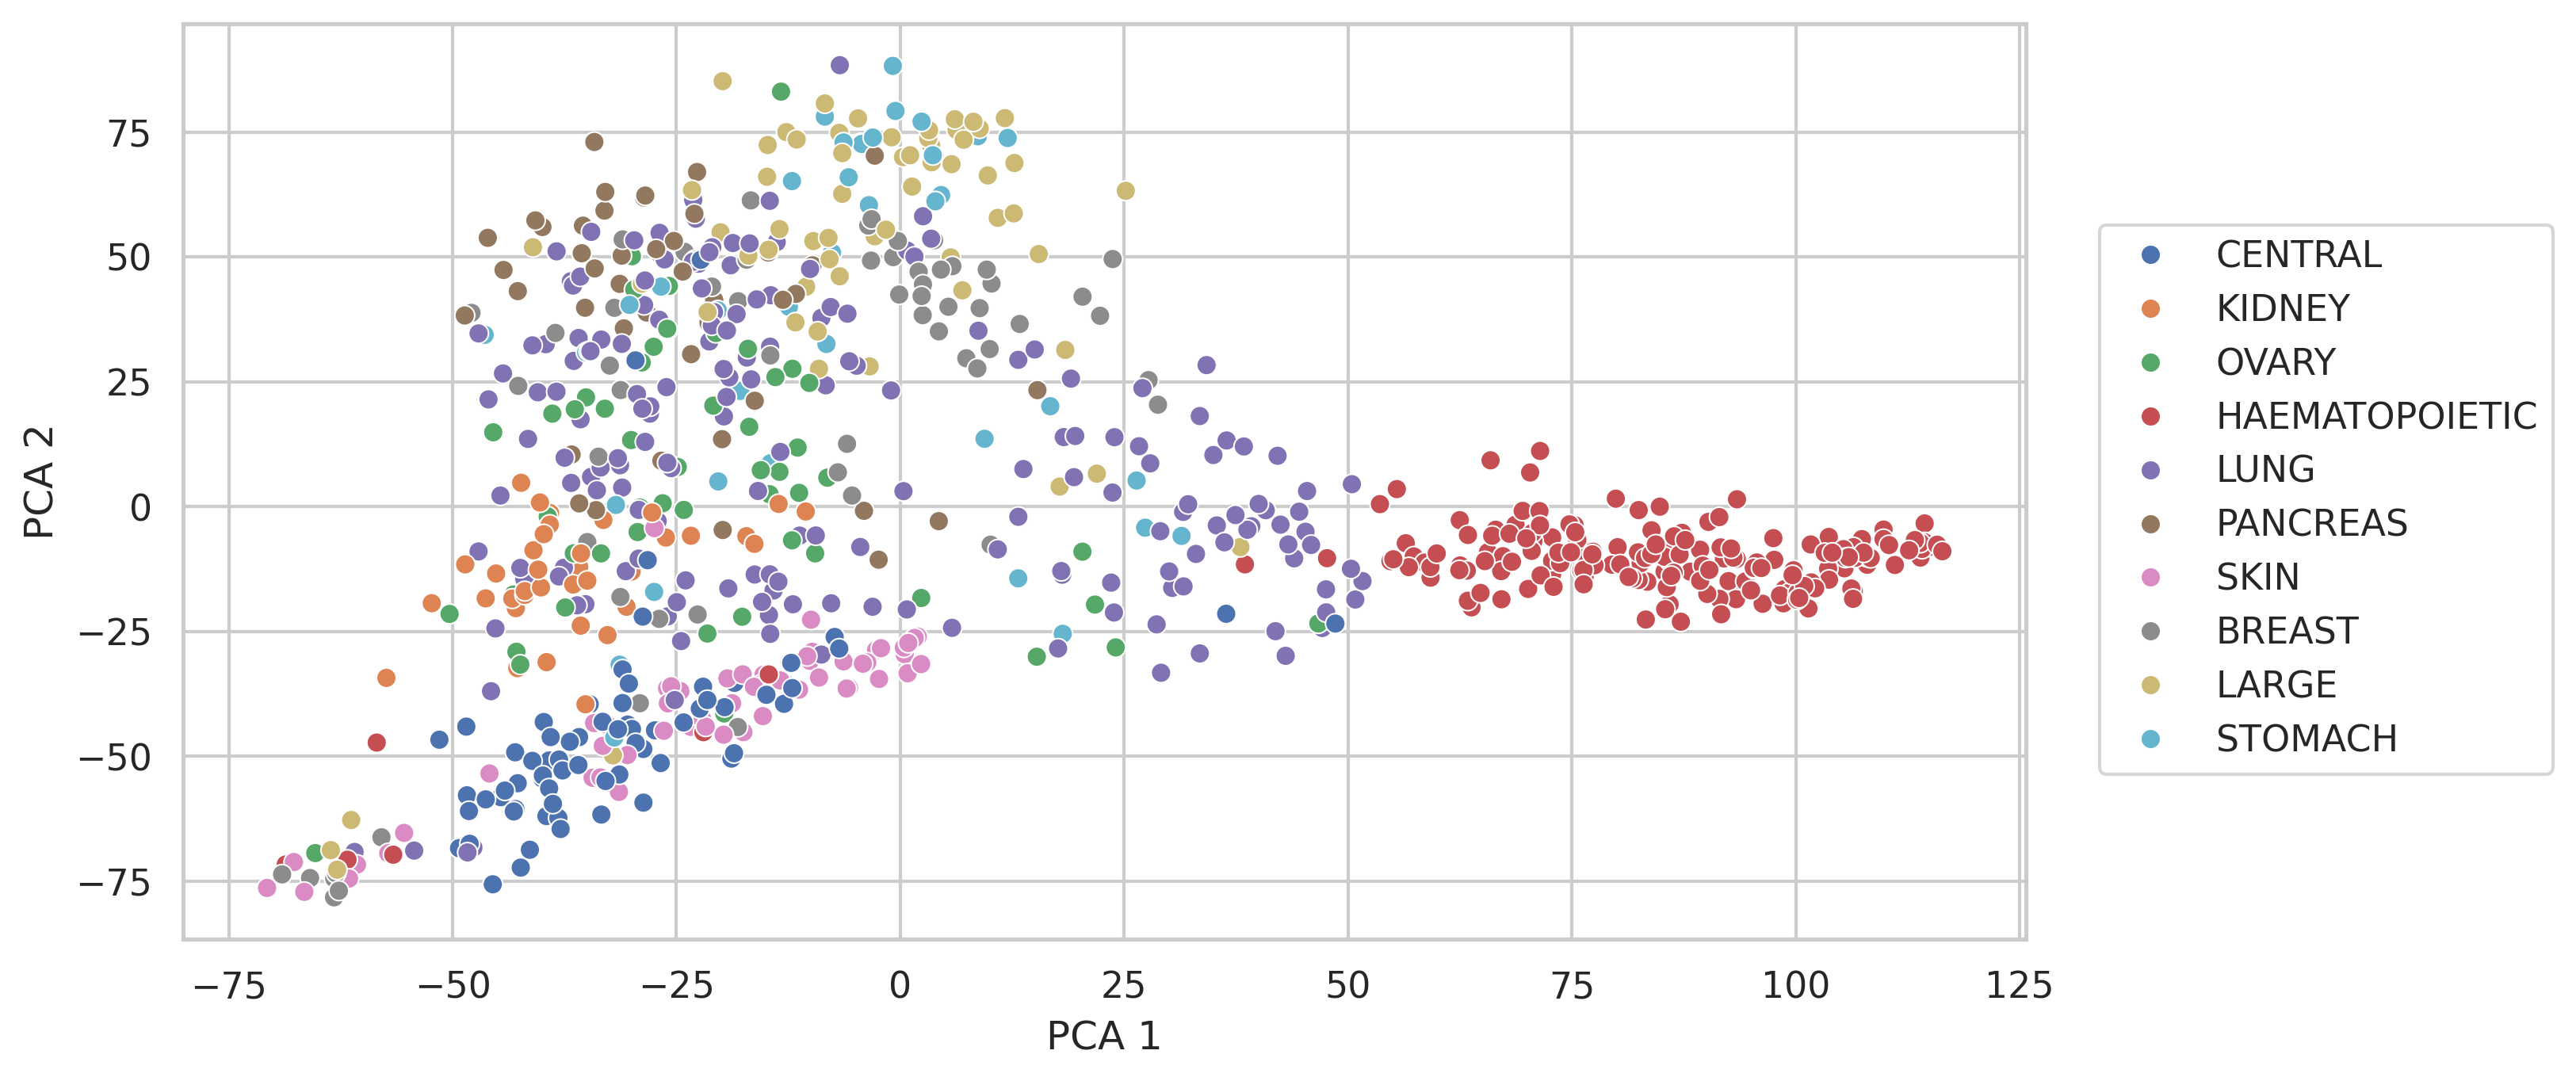

In [28]:
# without z-transform
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2 for 2D PCA
transformed_data = pca.fit_transform(df.T)

dfs=pd.DataFrame({'x':transformed_data[:,0], 'y':transformed_data[:,1], 'cellline':df.columns})
dfs['Set']=ccl_type
dfs=dfs[dfs['Set'].isin(list(dfs.value_counts('Set').index)[:10])]

sns.scatterplot(data=dfs, x='x', y='y', hue='Set')
plt.legend(bbox_to_anchor=(1.03, 0.8), loc='upper left')  # Adjust the tuple values for different positions

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

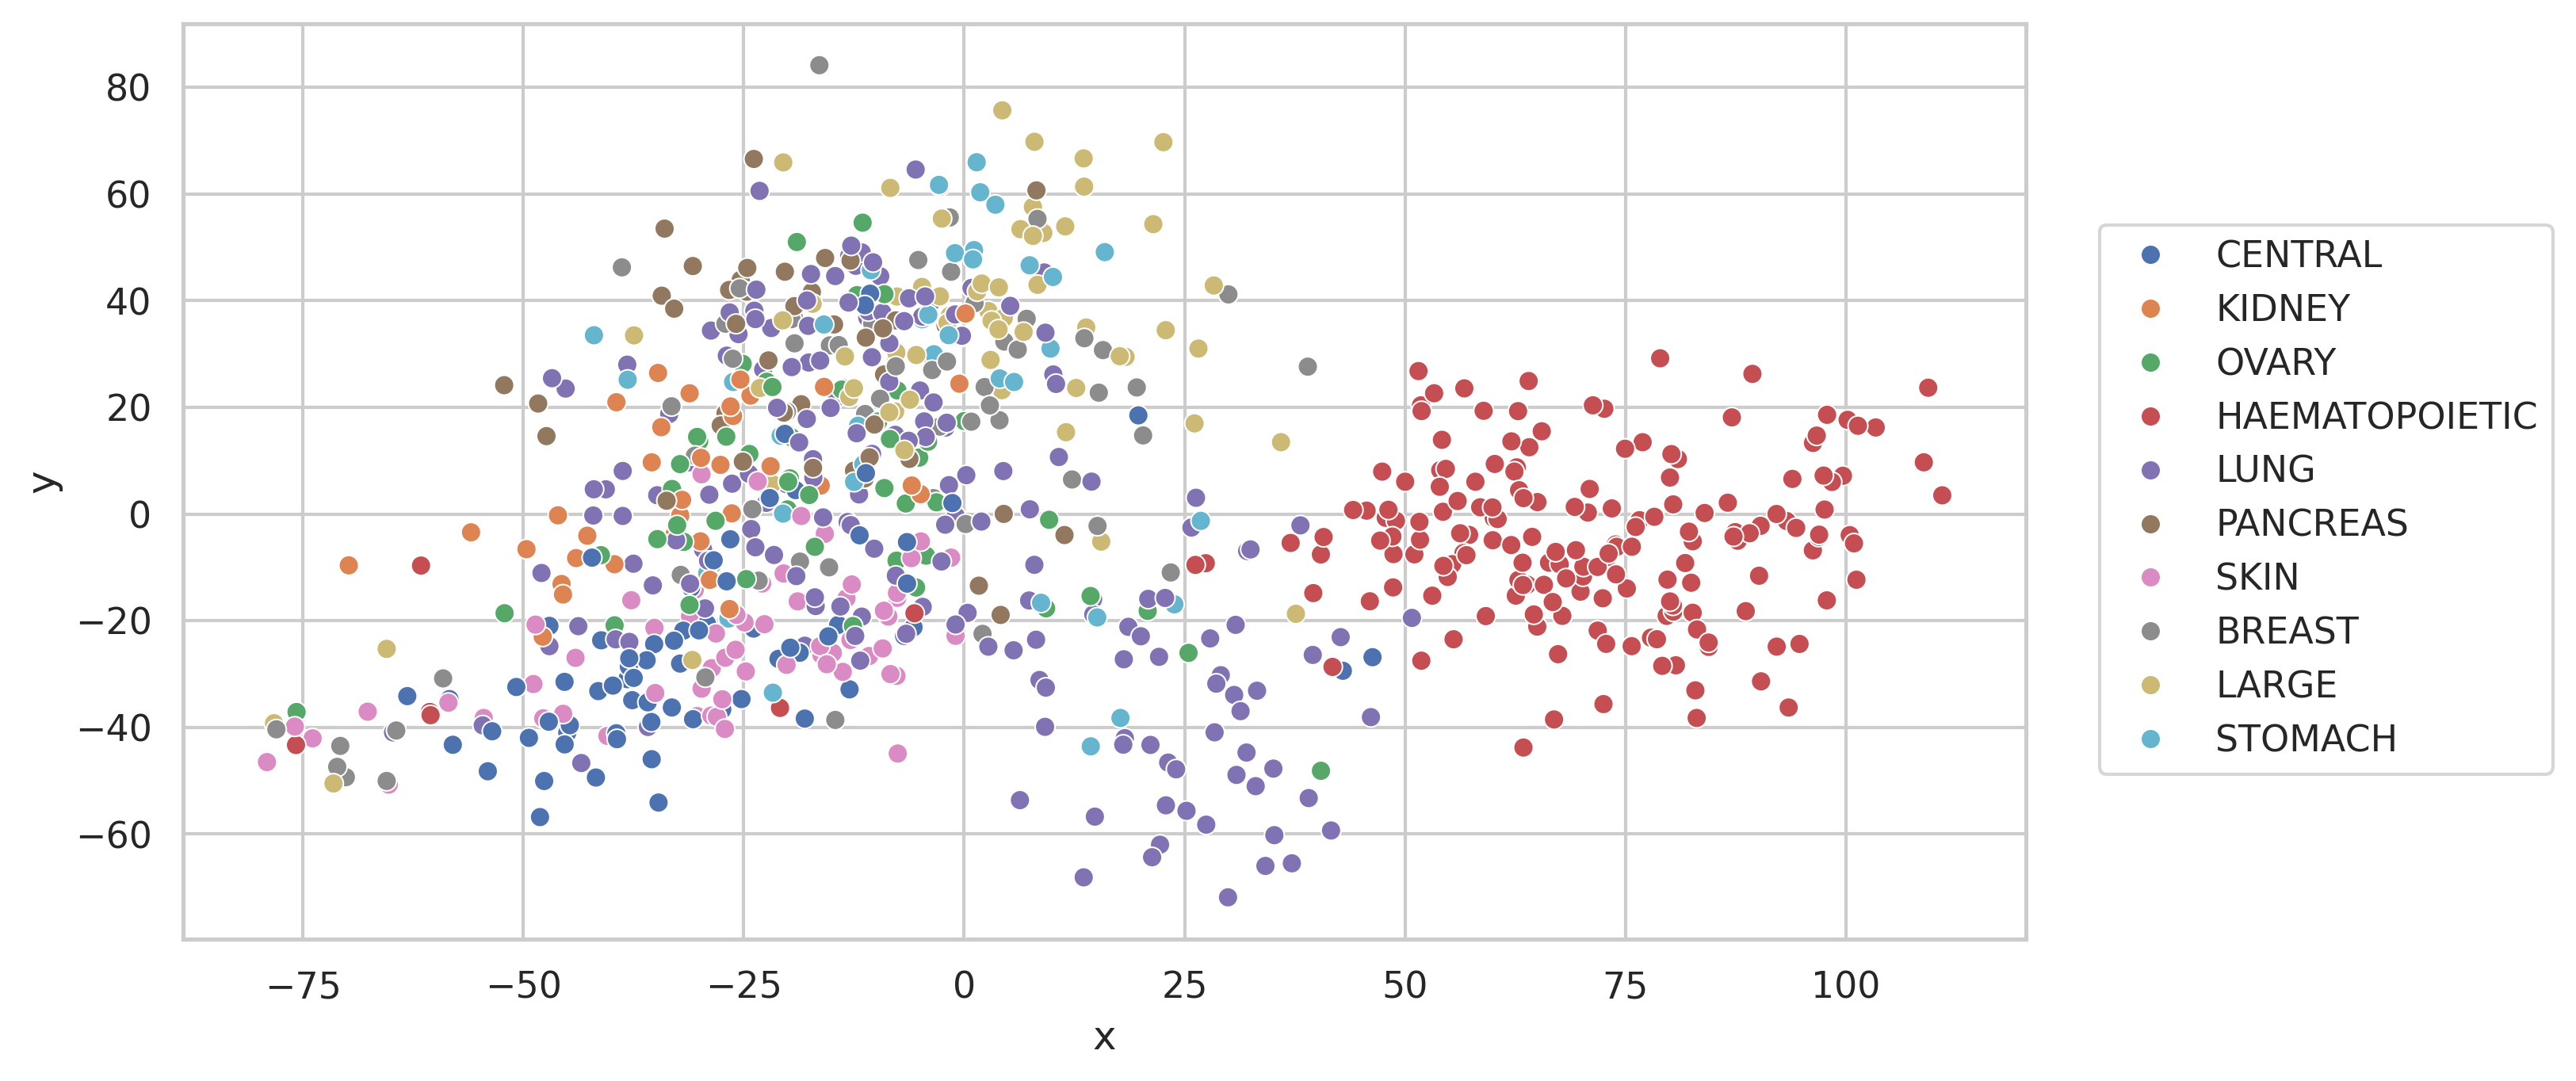

In [35]:
# with z-transform
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2 for 2D PCA
transformed_data = pca.fit_transform(df.T)

dfs=pd.DataFrame({'x':transformed_data[:,0], 'y':transformed_data[:,1], 'cellline':df.columns})
dfs['Set']=ccl_type
dfs=dfs[dfs['Set'].isin(list(dfs.value_counts('Set').index)[:10])]

sns.scatterplot(data=dfs, x='x', y='y', hue='Set')
plt.legend(bbox_to_anchor=(1.03, 0.8), loc='upper left')  # Adjust the tuple values for different positions

In [24]:
# Save it

In [26]:
df.to_pickle(f'{Path}/CCLE_RNA.pkl')

In [ ]:
# Save the cell line to entity type dict

In [24]:
dfs.to_pickle(f'{Path}/CCLE_RNA_dfs.pkl')

In [6]:
# Make cancer type to matrix

In [24]:
dfs = pd.read_pickle(f'{Path}/CCLE_RNA_dfs.pkl')
sets = sorted(set(dfs['Set']))
Ds = dict(zip(sets, range(len(sets))))
ccls = sorted(set(dfs['cellline']))
Dc = dict(zip(ccls, range(len(ccls))))
M=np.zeros((len(ccls), len(sets)))
a,b = list(dfs['Set']), list(dfs['cellline'])
for i in range(len(dfs)):
    M[Dc[b[i]],Ds[a[i]]]=1
M=pd.DataFrame(data=M, columns=sets, index=ccls).T
M

,1321N1,23132/87,42MGBA,59M,697,769P,786O,8MGBA,A101D,A1207,...,WM88,WM983B,WSUDLCL2,WT2IPS,YAPC,YH13,YKG1,YMB1,ZR751,ZR7530
BREAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
CENTRAL,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
HAEMATOPOIETIC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KIDNEY,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVARY,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PANCREAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
SKIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
STOMACH,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
M.to_pickle(f'/home/mgander/Atlantic/data/Ccl_identity.pkl')

In [26]:
def load_identity():
    M0=pd.read_pickle(f'/home/mgander/Atlantic/data/Ccl_identity.pkl')
    M0.columns=[a+f'_{i}' for i,a in enumerate(M0.columns)]
    D_prot={}
    for a in M0.columns:
        D_prot[a]=np.array(M0[a])
    features=list(M0.index)
    celllines=[a.split('_')[0] for a in D_prot.keys()]
    return(D_prot, features, celllines)

In [27]:
load_identity()

({'1321N1_0': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  '23132/87_1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  '42MGBA_2': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  '59M_3': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  '697_4': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  '769P_5': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  '786O_6': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  '8MGBA_7': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'A101D_8': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'A1207_9': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'A172_10': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'A2058_11': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'A2780_12': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  'A3/KAWAKAMI_13': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  'A375_14': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'A4/FUKUDA_15': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0